#  Linear Discriminant Analysis (LDA)

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
print(dataset.head(10))
print(dataset.describe())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1

# Splitting the dataset into Independent and Dependent Variable

In [3]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

print("-----X----")
print(X[:10])
print(type(X))
print(X.shape)
print("-----y----")
print(y[:10])
print(y.shape)

-----X----
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00 3.390e+00
  3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]
 [1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
  3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.

# Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("-----X_train-------")
print(X_train[:5])
print(type(X_train))
print(X_train.shape)

print("---------X_test------")
print(X_test[:5])
print(type(X_test))
print(X_test.shape)

print("---------y_train------")
print(y_train[:5])
print(type(y_train))
print(y_train.shape)

print("---------y_test------")
print(y_test[:5])
print(type(y_test))
print(y_test.shape)

-----X_train-------
[[1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
  5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 2.070e+01 8.000e+01 1.380e+00 1.460e+00
  5.800e-01 1.620e+00 3.050e+00 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 1.800e+01 9.800e+01 3.020e+00 2.260e+00
  1.700e-01 1.350e+00 3.250e+00 1.160e+00 2.960e+00 3.450e+02]
 [1.340e+01 3.910e+00 2.480e+00 2.300e+01 1.020e+02 1.800e+00 7.500e-01
  4.300e-01 1.410e+00 7.300e+00 7.000e-01 1.560e+00 7.500e+02]
 [1.350e+01 1.810e+00 2.610e+00 2.000e+01 9.600e+01 2.530e+00 2.610e+00
  2.800e-01 1.660e+00 3.520e+00 1.120e+00 3.820e+00 8.450e+02]]
<class 'numpy.ndarray'>
(142, 13)
---------X_test------
[[1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
  2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]
 [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
  2.400e-01 1.260e+00 1.080e+01 4.800e-01

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("-----X_train-------")
print(X_train[:5])
print("---------X_test------")
print(X_test[:5])

-----X_train-------
[[ 0.87668336  0.79842885  0.64412971  0.12974277  0.48853231 -0.70326216
  -1.42846826  1.0724566  -1.36820277  0.35193216  0.0290166  -1.06412236
  -0.2059076 ]
 [-0.36659076 -0.7581304  -0.39779858  0.33380024 -1.41302392 -1.44153145
  -0.5029981   1.70109989  0.02366802 -0.84114577  0.0290166  -0.73083231
  -0.81704676]
 [-1.69689407 -0.34424759 -0.32337513 -0.45327855 -0.14531976  1.24904997
   0.31964204 -1.52069698 -0.4346309  -0.75682931  0.90197362  0.51900537
  -1.31256499]
 [ 0.51613387  1.38326325  0.42085937  1.00427477  0.13639227 -0.75248011
  -1.23309123  0.52239372 -0.33278669  0.95057904 -1.10582753 -1.42518658
   0.02533424]
 [ 0.64046128 -0.50620174  0.90461179  0.12974277 -0.28617578  0.44515674
   0.67954711 -0.65631245  0.09156415 -0.64300209  0.72738222  1.7132947
   0.33916246]]
---------X_test------
[[ 0.93884707 -0.63216607 -0.4350103  -0.91969562  1.26324041  0.55999863
   0.97775416 -1.20637533  0.02366802  0.3392847  -0.1455748   0.8522

# Applying LDA

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

print("-----X_train-------")
print(X_train[:5])
print("---------X_test------")
print(X_test[:5])

-----X_train-------
[[ 3.57315552  1.94018924]
 [ 0.85475898 -2.08182977]
 [ 0.62173655 -3.06234453]
 [ 4.80786412  2.00638739]
 [-3.8579759   0.14987256]]
---------X_test------
[[-3.83960313  1.54567265]
 [ 5.24601727  1.72358501]
 [-0.66064228 -3.32231072]
 [-2.16667061  1.0147427 ]
 [-0.16079996 -1.27171643]]


# Fitting Logistic Regression to the Training set

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


# Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


# Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


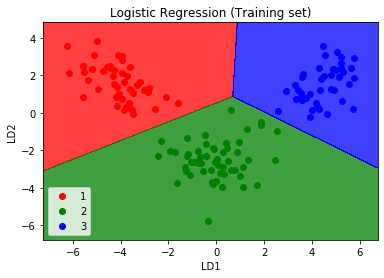

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


# Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


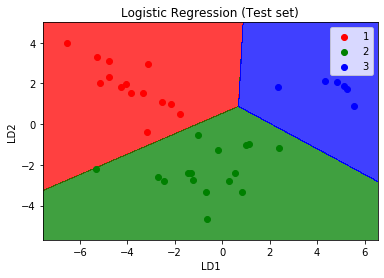

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()